# Assignment 2 - part 2

## Convolutional neural network

Use the training and evaluation pipeline developed in part 1 to train and evaluate two CNN models.
The first shall be composed of standard convolutional layers, non-linaerities, and pooling layers of your choice. The second shall include skip connections. For this you shall develop your own ResidualBlack as a new layer under the nn.Module super-class. 

### Train and apply model

Train the two models. Try different values of the hyper-paramter settings. You shall achieve at least 93% test accuracy with your best model.

Describe briefly your two models and your hyper-parameter setups and comment your results.

**Compare the performance of the two models and the three feed forward models using suitable supportive tables and graphs, and complemented by relevant comments.**


# Data Preparation

In [1]:
import matplotlib.pyplot as plt
import torch
import torchvision
from torch.utils.data import DataLoader, TensorDataset

train_dataset = torchvision.datasets.FashionMNIST('data/train', train=True, download=True)
test_dataset = torchvision.datasets.FashionMNIST('data/test', train=False, download=True)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
data = dict()
data["x"] = train_dataset.data.to(torch.float).to(device)
data["y"] = train_dataset.targets.to(device)
data["x_test"] = test_dataset.data.to(torch.float).to(device)
data["y_test"] = test_dataset.targets.to(device)

batch_size = 64
train_set = TensorDataset(data["x"], data["y"])
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
output_dim = len(train_dataset.classes)
print(output_dim)

cpu
10


# Training

CnnModel1(
  (model): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=valid)
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=valid)
    (4): ReLU()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=400, out_features=100, bias=True)
    (8): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Dropout(p=0.25, inplace=False)
    (11): Linear(in_features=100, out_features=50, bias=True)
    (12): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU()
    (14): Dropout(p=0.25, inplace=False)
    (15): Linear(in_features=50, out_features=20, bias=True)
    (16): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (17): ReLU()
    (18): Dropout(p=0.25, inplace=False)
    (19

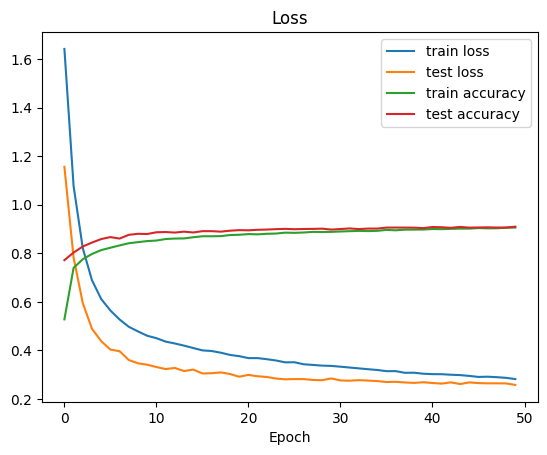

In [2]:

from models.cnn1 import CnnModel1
from models.cnn2 import CnnModel2
# define function mlp_train so that it can be run from this cell
from train import mlp_train

# train and evaluate mlp_model
model = CnnModel1(output_dim)
model.to(device)
model, train_losses, train_accuracies, test_losses, test_accuracies = mlp_train(model, data, train_loader,
                                                                                learning_rate=0.0001,
                                                                                max_epochs=50)
# model: untrained model
print(model)

plt.plot(train_losses, label="train loss")
plt.plot(test_losses, label="test loss")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend()

plt.title('Loss')
plt.xlabel('Epoch')

print(f"Train Accuracy: {train_accuracies[-1]}")
print(f"Test Accuracy: {test_accuracies[-1]}")